In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\1.ushape.csv",header=None)

In [65]:
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.2,random_state=0)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [68]:
X_train_trf.shape

(80, 2)

In [69]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

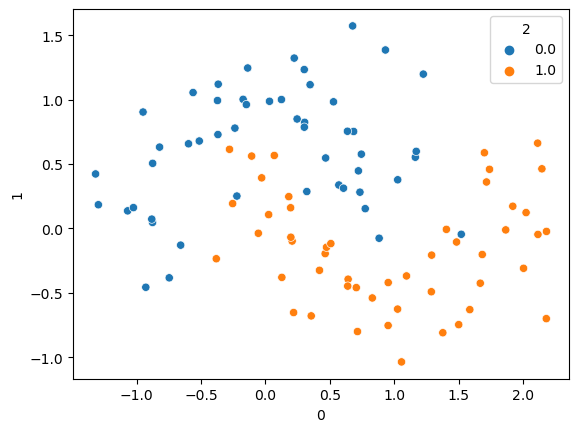

In [70]:
sns.scatterplot(df[0],df[1],hue=df[2])

In [71]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=2))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 dense_10 (Dense)            (None, 2)                 8         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.get_weights()

[array([[-0.8559965 , -0.34210932, -0.6310707 ],
        [ 0.5035732 ,  1.0269225 , -0.7773082 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.04560137,  0.14494193],
        [ 0.32097435,  0.72486055],
        [-0.6799346 ,  0.5725553 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.3890252 ],
        [ 0.17489016]], dtype=float32),
 array([0.], dtype=float32)]

In [57]:
weights=model.get_weights()

In [58]:
weights[0].shape

(2, 3)

In [59]:
weights[0]=np.full(weights[0].shape,4)
weights[1]=np.full(weights[1].shape,4)
weights[2]=np.full(weights[2].shape,4)
weights[3]=np.full(weights[3].shape,4)
weights[4]=np.full(weights[4].shape,4)
weights[5]=np.full(weights[5].shape,4)
model.set_weights(weights)

In [60]:
model.get_weights()

[array([[4., 4., 4.],
        [4., 4., 4.]], dtype=float32),
 array([4., 4., 4.], dtype=float32),
 array([[4., 4.],
        [4., 4.],
        [4., 4.]], dtype=float32),
 array([4., 4.], dtype=float32),
 array([[4.],
        [4.]], dtype=float32),
 array([4.], dtype=float32)]

In [61]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2,)

Epoch 1/100
2/2 [==============================] - 2s 293ms/step - loss: 6.3744 - accuracy: 0.4688 - val_loss: 5.2474 - val_accuracy: 0.5625
Epoch 2/100
2/2 [==============================] - 0s 76ms/step - loss: 6.3712 - accuracy: 0.4688 - val_loss: 5.2449 - val_accuracy: 0.5625
Epoch 3/100
2/2 [==============================] - 0s 102ms/step - loss: 6.3680 - accuracy: 0.4688 - val_loss: 5.2422 - val_accuracy: 0.5625
Epoch 4/100
2/2 [==============================] - 0s 94ms/step - loss: 6.3648 - accuracy: 0.4688 - val_loss: 5.2396 - val_accuracy: 0.5625
Epoch 5/100
2/2 [==============================] - 0s 69ms/step - loss: 6.3618 - accuracy: 0.4688 - val_loss: 5.2370 - val_accuracy: 0.5625
Epoch 6/100
2/2 [==============================] - 0s 71ms/step - loss: 6.3585 - accuracy: 0.4688 - val_loss: 5.2344 - val_accuracy: 0.5625
Epoch 7/100
2/2 [==============================] - 0s 68ms/step - loss: 6.3555 - accuracy: 0.4688 - val_loss: 5.2318 - val_accuracy: 0.5625
Epoch 8/100
2/2 [=

In [63]:
model.get_weights()

[array([[4.169863, 4.169863, 4.169863],
        [4.139292, 4.139292, 4.139292]], dtype=float32),
 array([3.8330293, 3.8330293, 3.8330293], dtype=float32),
 array([[3.826666, 3.826666],
        [3.826666, 3.826666],
        [3.826666, 3.826666]], dtype=float32),
 array([3.8371463, 3.8371463], dtype=float32),
 array([[3.8036973],
        [3.8036973]], dtype=float32),
 array([3.8036914], dtype=float32)]

In [47]:
y_pred = model.predict(X_train)

3/3 [==============================] - 0s 3ms/step


In [48]:
y_pred=np.where(y_pred>0.5,1,0)

In [49]:
y_pred=y_pred.flatten()

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.5125

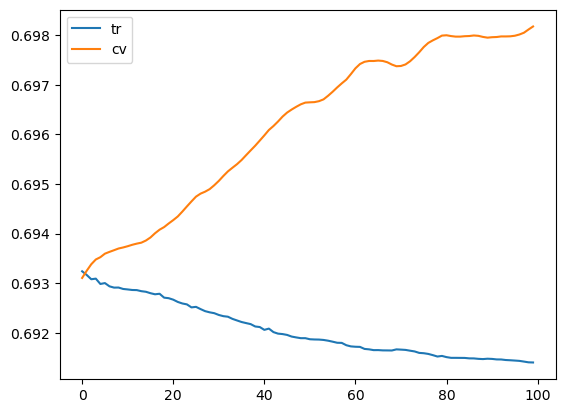

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label="tr")
plt.plot(history.history['val_loss'],label="cv")
plt.legend()

In [52]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 18s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

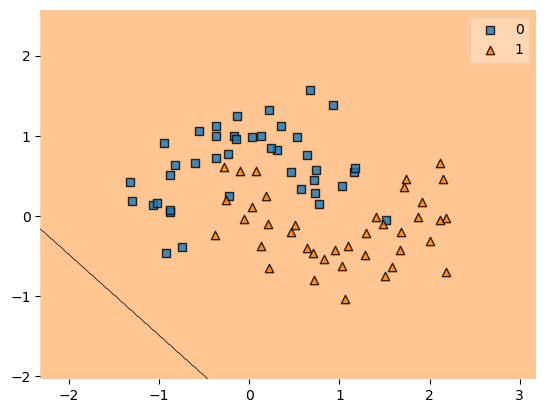

In [64]:
plot_decision_regions(X_train[[0,1]].values,y_train.values.astype(int),clf=model)

In [63]:
model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=2))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [64]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 9         
                                                                 
 dense_13 (Dense)            (None, 2)                 8         
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [65]:
weights=model.get_weights()

In [71]:
weights[0]=np.full(weights[0].shape,3)
weights[1]=np.full(weights[1].shape,3)
weights[2]=np.full(weights[2].shape,3)
weights[3]=np.full(weights[3].shape,3)
weights[4]=np.full(weights[4].shape,3)
weights[5]=np.full(weights[5].shape,3)
model.set_weights(weights)

In [72]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2,)

Epoch 1/100
2/2 [==============================] - 1s 241ms/step - loss: 4.7801 - accuracy: 0.4688 - val_loss: 3.9350 - val_accuracy: 0.5625
Epoch 2/100
2/2 [==============================] - 0s 41ms/step - loss: 4.7770 - accuracy: 0.4688 - val_loss: 3.9324 - val_accuracy: 0.5625
Epoch 3/100
2/2 [==============================] - 0s 36ms/step - loss: 4.7737 - accuracy: 0.4688 - val_loss: 3.9297 - val_accuracy: 0.5625
Epoch 4/100
2/2 [==============================] - 0s 40ms/step - loss: 4.7704 - accuracy: 0.4688 - val_loss: 3.9271 - val_accuracy: 0.5625
Epoch 5/100
2/2 [==============================] - 0s 49ms/step - loss: 4.7673 - accuracy: 0.4688 - val_loss: 3.9245 - val_accuracy: 0.5625
Epoch 6/100
2/2 [==============================] - 0s 44ms/step - loss: 4.7641 - accuracy: 0.4688 - val_loss: 3.9218 - val_accuracy: 0.5625
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 4.7608 - accuracy: 0.4688 - val_loss: 3.9192 - val_accuracy: 0.5625
Epoch 8/100
2/2 [==

In [60]:
model.get_weights()

[array([[-0.28811568, -0.28811568, -0.28811568],
        [ 0.28903875,  0.28903875,  0.28903875]], dtype=float32),
 array([0.03420981, 0.03420981, 0.03420981], dtype=float32),
 array([[0.09975203, 0.09975203],
        [0.09975203, 0.09975203],
        [0.09975203, 0.09975203]], dtype=float32),
 array([0.03618505, 0.03618505], dtype=float32),
 array([[-0.03796045],
        [-0.03796045]], dtype=float32),
 array([-0.03563974], dtype=float32)]

In [74]:
y_pred = model.predict(X_train)
y_pred=np.where(y_pred>0.5,1,0)
y_pred=y_pred.flatten()
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

3/3 [==============================] - 0s 8ms/step


0.4875

3888/3888 [==============================] - 4s 999us/step


C:\Users\saxon\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

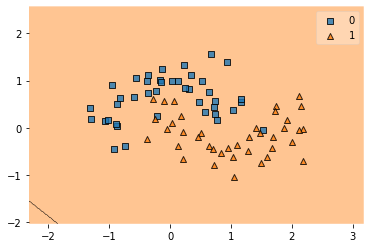

In [75]:
plot_decision_regions(X_train[[0,1]].values,y_train.values.astype(int),clf=model)